## Compute Entropy

In [69]:
import numpy as np

def compute_entropy(probabilities, base=2):
    """
    Compute Shannon entropy for a given list or array of class probabilities.

    Parameters:
    - probabilities: list or numpy array of probabilities (must sum to 1)
    - base: logarithm base (default is 2 for bits)

    Returns:
    - entropy: Shannon entropy value
    """
    probabilities = np.array(probabilities)
    
    # Filter out zero probabilities to avoid log(0)
    nonzero_probs = probabilities[probabilities > 0]
    
    entropy = -np.sum(nonzero_probs * np.log(nonzero_probs) / np.log(base))
    return entropy



# Uneven class distribution
print(compute_entropy([0.125, 0.875]))  # Output: < 1

# Binary case: class 1 = 0.5, class 2 = 0.5
print(compute_entropy([0.5, 0.5]))  # Output: 1.0

# Uneven class distribution
print(compute_entropy([0.875, 0.125]))  # Output: < 1



0.5435644431995964
1.0
0.5435644431995964


## Visualizing Shannon entropy for binary probabilities.

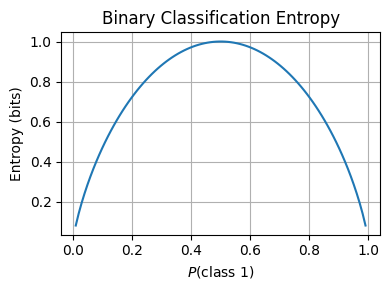

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def compute_entropy(probabilities, base=2):
    """
    Compute Shannon entropy for binary or multi-class probabilities.

    Parameters:
    - probabilities: list or np.array of class probabilities (should sum to 1)
    - base: logarithm base (default 2 for bits)

    Returns:
    - entropy: float
    """
    probabilities = np.array(probabilities)
    probabilities = probabilities[probabilities > 0]  # avoid log(0)
    return -np.sum(probabilities * np.log(probabilities) / np.log(base))

# Generate probability values for class 1 (avoid 0 and 1 to prevent log(0))
p_class1 = np.linspace(0.01, 0.99, 100)
entropy_values = []

# Compute entropy for each pair of (p, 1-p)
for p1 in p_class1:
    p2 = 1 - p1
    entropy = compute_entropy([p1, p2])
    entropy_values.append(entropy)

# Plot the entropy curve
plt.figure(figsize=(4, 3))
plt.plot(p_class1, entropy_values, label='Entropy')
plt.xlabel(r'$P(\mathrm{class\ 1})$')
plt.ylabel('Entropy (bits)')
plt.title('Binary Classification Entropy')
plt.grid(True)
plt.tight_layout()
plt.show()


## Softmax Function 

In [71]:
import numpy as np

def softmax(logits):
    """
    Compute softmax probabilities from logits.

    Parameters:
    - logits: array-like (list or np.array) of raw scores

    Returns:
    - softmax_probs: np.array of probabilities (sums to 1)
    """
    logits = np.array(logits)
    
    """ Why subtract max(logits)? 
    - To avoid numerical overflow in np.exp.
    - It doesn't affect the final result because softmax is invariant to constant shifts.
    """
    shifted_logits = logits - np.max(logits)  # for numerical stability
    exp_scores = np.exp(shifted_logits)
    softmax_probs = exp_scores / np.sum(exp_scores)
    return softmax_probs

logits = [3.1, 1.00, 1.00]
probs = softmax(logits)
print("Softmax probabilities:", probs)
print("Sum of probabilities:", np.sum(probs))  # Should be close to 1


Softmax probabilities: [0.80326908 0.09836546 0.09836546]
Sum of probabilities: 1.0


## Two distributions (predicted probabilities and true labels)

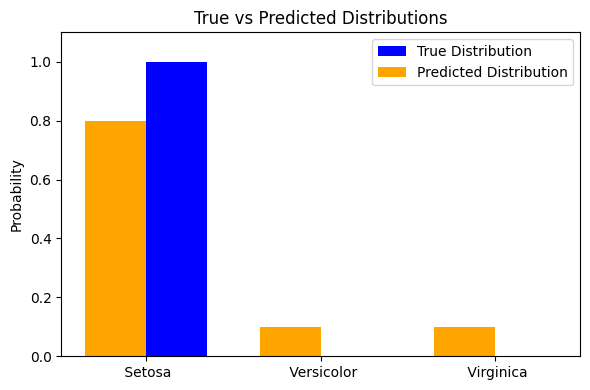

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Two distributions
predicted = np.array([0.8, 0.1, 0.1])
true = np.array([1.0, 0.0, 0.0])

# Plotting
x = np.arange(len(predicted))
bar_width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x + bar_width/2, true, bar_width, label='True Distribution', color='blue')
plt.bar(x - bar_width/2, predicted, bar_width, label='Predicted Distribution', color='orange')

plt.xticks(x, [f' {i}' for i in ["Setosa","Versicolor","Virginica"]])
plt.ylabel('Probability')
plt.title('True vs Predicted Distributions')
plt.legend()
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


In [73]:
## Single Example: Cross-Entropy Loss with One-Hot

In [79]:
import numpy as np

def softmax(logits):
    exps = np.exp(logits - np.max(logits))  # numerical stability
    return exps / np.sum(exps)

def cross_entropy_one_hot_single(logits, one_hot_target):
    """
    logits: 1D array of shape (num_classes,)
    one_hot_target: 1D array of shape (num_classes,)
    """
    probs = softmax(logits)
    log_probs = np.log(probs + 1e-15)  # epsilon for numerical stability
    loss = -np.sum(one_hot_target * log_probs)
    return loss


# Single input (logits) for 3 classes
logits = np.array([3.1, 1.0, 1.0])
print("Softmax (One Example):", softmax(logits))

# True label: class 0 (one-hot encoded)
one_hot_target = np.array([1, 0, 0])

loss = cross_entropy_one_hot_single(logits, one_hot_target)
print(f"Cross-Entropy Loss (One Example): {loss:.4f}")

Softmax (One Example): [0.80326908 0.09836546 0.09836546]
Cross-Entropy Loss (One Example): 0.2191


## Visulizing Binary Cross-Entropy Loss
Assume a model has the predicted probability y`
- Case 1: visulize BCE loss is true label =1
- Case 2: visulize BCE loss is true label =0


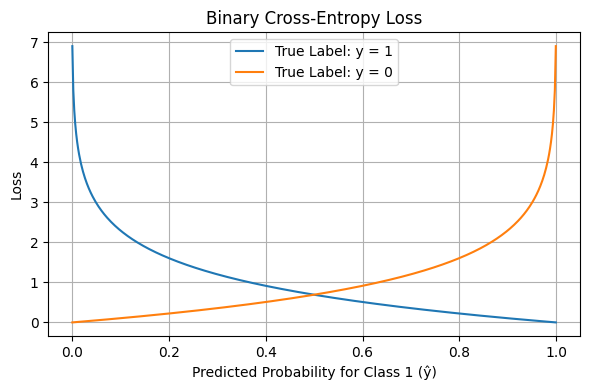

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Binary cross-entropy loss for true label y = 1 and y = 0
pred_probs = np.linspace(0.001, 0.999, 500)  # Avoid log(0)

# Compute cross-entropy loss
loss_y1 = -np.log(pred_probs)                  # When true label y = 1
loss_y0 = -np.log(1 - pred_probs)              # When true label y = 0

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(pred_probs, loss_y1, label='True Label: y = 1')
plt.plot(pred_probs, loss_y0, label='True Label: y = 0')
plt.title('Binary Cross-Entropy Loss')
plt.xlabel('Predicted Probability for Class 1 (ŷ)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()